# Travelling Salesman Problem

Aluno: Marcos Felipe Pontes Rezende

Soluções para o problema do caixeiro viajante utilizando força bruta e branch and bound.

In [114]:
# implementação própria de um grafo representado como uma matriz de adjacências
from pyalg.graph import Graph

import numpy as np
from tqdm import tqdm

[0, 3, 5, 2, 0]
[3, 0, 2, 4, 2]
[5, 2, 0, 0, 5]
[2, 4, 0, 0, 1]
[0, 2, 5, 1, 0]


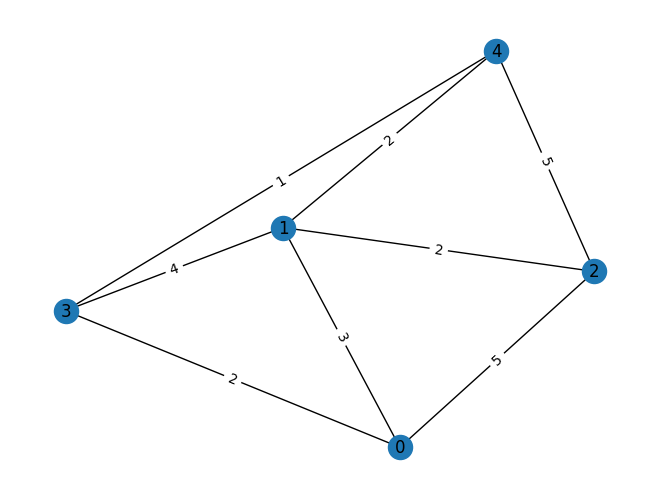

In [115]:
graph = Graph.random(n=5, max_value=5)
print(graph)
graph.plot()
 

As instâncias usadas para testar serão 10 instâncias aleatórias de 3 tamanhos diferentes (10, 50 e 500)

In [137]:
instances = 10

small_instances = [Graph.random(n=5, max_value=5) for i in range(instances)]
medium_instances = [Graph.random(n=10, max_value=5) for i in range(instances)]
large_instances = [Graph.random(n=12, max_value=5) for i in range(instances)]

In [117]:
def cost(graph: Graph, path: list):
    cost = 0
    for i in range(len(path) - 1):
        cost += graph.adjacency_matrix[path[i]][path[i + 1]]
    return cost


def is_possible(graph, node, path):
    if path:
        return node not in path and graph.adjacency_matrix[path[-1]][node] > 0
    else:
        return True

# Força Bruta

In [118]:
def brute_force_tsp(graph: Graph, path=[], best_path=[], best_cost=np.infty):
    if len(path) == len(graph.adjacency_matrix):
        final_path = path + [path[0]]
        new_cost = cost(graph, final_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_path = final_path

    else:
        for node in range(len(graph.adjacency_matrix)):
            if is_possible(graph, node, path):
                best_path, best_cost = brute_force_tsp(
                    graph, path + [node], best_path, best_cost
                )

    return best_path, best_cost

Agora vamos modificar este código para adicionar contadores para medir desempenho

In [119]:
import time

def brute_force_tsp_benchmarked(graph: Graph):
    BRUTE_FORCE_COMPARISONS = 0
    BRUTE_FORCE_NUMBER_SOLUTIONS = 0
    BRUTE_FORCE_TIME = 0

    def __brute_force_tsp(graph: Graph, path=[], best_path=[], best_cost=np.infty):
        nonlocal BRUTE_FORCE_COMPARISONS, BRUTE_FORCE_NUMBER_SOLUTIONS
        
        BRUTE_FORCE_COMPARISONS += 1
        if len(path) == len(graph.adjacency_matrix):
            final_path = path + [path[0]]  
            
            BRUTE_FORCE_COMPARISONS += len(final_path)
            new_cost = cost(graph, final_path)
            
            BRUTE_FORCE_COMPARISONS += 1 
            BRUTE_FORCE_NUMBER_SOLUTIONS += 1
            if new_cost < best_cost:
                best_cost = new_cost
                best_path = final_path
        else:
            for node in range(len(graph.adjacency_matrix)):
                BRUTE_FORCE_COMPARISONS += 1
                
                BRUTE_FORCE_COMPARISONS += len(path) + 1
                if is_possible(graph, node, path):
                    best_path, best_cost = __brute_force_tsp(
                        graph, path + [node], best_path, best_cost
                    )

        return best_path, best_cost

    start_time = time.time()
    solution = __brute_force_tsp(graph)
    end_time = time.time()
    BRUTE_FORCE_TIME = end_time - start_time
    
    return solution, BRUTE_FORCE_TIME, BRUTE_FORCE_COMPARISONS, BRUTE_FORCE_NUMBER_SOLUTIONS

Vamos agora coletar métricas de execução para o algoritmo utilizando grafos de diferentes tamanhos.

In [120]:
small_times_bf = []
small_comparisons_bf = []
small_candidates_found_bf = [] 
small_solutions_bf = []

for instance in tqdm(small_instances):
    solution, total_time, comparisons, candidates_found = brute_force_tsp_benchmarked(instance)
    small_times_bf.append(total_time)
    small_comparisons_bf.append(comparisons)
    small_candidates_found_bf.append(candidates_found)
    small_solutions_bf.append(solution)
    

100%|██████████| 10/10 [00:00<00:00, 4775.48it/s]


In [121]:
medium_times_bf = []
medium_comparisons_bf = []
medium_candidates_found_bf = []
medium_solutions_bf = []

for instance in tqdm(medium_instances):
    solution, total_time, comparisons, candidates_found = brute_force_tsp_benchmarked(instance)
    medium_times_bf.append(total_time)
    medium_comparisons_bf.append(comparisons)
    medium_candidates_found_bf.append(candidates_found)
    medium_solutions_bf.append(solution)

100%|██████████| 10/10 [00:29<00:00,  2.96s/it]


In [138]:
large_times_bf = []
large_comparisons_bf = []
large_candidates_found_bf = []
large_solutions_bf = []

for instance in tqdm(large_instances):
    solution, total_time, comparisons, candidates_found = brute_force_tsp_benchmarked(instance)
    large_times_bf.append(total_time)
    large_comparisons_bf.append(comparisons)
    large_candidates_found_bf.append(candidates_found)
    large_solutions_bf.append(solution)

100%|██████████| 10/10 [1:04:01<00:00, 384.11s/it]


# Branch-And-Bound

A heurística definida para o algoritmo branch-and-bound para o problema TSP será:
- Soma das arestas de menor custo dos nós não visitados

In [123]:

def heuristic(graph, path):
    val = 0
    for i in range(len(path), len(graph.adjacency_matrix)):
        val += np.min(graph.adjacency_matrix[i])
    return val


In [126]:
def branch_and_bound_tsp(graph: Graph, path=[], best_path=[], best_cost=np.infty):
    if len(path) == len(graph.adjacency_matrix):
        final_path = path + [path[0]]
        new_cost = cost(graph, final_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_path = final_path

    else:
        for node in range(len(graph.adjacency_matrix)):
            if (
                is_possible(graph, node, path)
                and cost(graph, path + [node]) + heuristic(graph, path + [node])
                < best_cost
            ):
                best_path, best_cost = branch_and_bound_tsp(
                    graph, path + [node], best_path, best_cost
                )

    return best_path, best_cost

Agora vamos modificar este código para adicionar contadores para medir desempenho

In [127]:
import time

def branch_and_bound_tsp_benchmarked(graph: Graph):
    BRANCH_AND_BOUND_COMPARISONS = 0
    BRANCH_AND_BOUND_NUMBER_SOLUTIONS = 0
    BRANCH_AND_BOUND_TIME = 0

    def __branch_and_bound_tsp(graph: Graph, path=[], best_path=[], best_cost=np.infty):
        nonlocal BRANCH_AND_BOUND_COMPARISONS, BRANCH_AND_BOUND_NUMBER_SOLUTIONS
        
        BRANCH_AND_BOUND_COMPARISONS += 1
        if len(path) == len(graph.adjacency_matrix):
            final_path = path + [path[0]] 
            
            BRANCH_AND_BOUND_COMPARISONS += len(final_path)
            new_cost = cost(graph, final_path)
            
            BRANCH_AND_BOUND_COMPARISONS += 1
            BRANCH_AND_BOUND_NUMBER_SOLUTIONS += 1
            if new_cost < best_cost:
                best_cost = new_cost
                best_path = final_path

        else:
            for node in range(len(graph.adjacency_matrix)):
                BRANCH_AND_BOUND_COMPARISONS += 1
                
                BRANCH_AND_BOUND_COMPARISONS += len(path)  + len(graph.adjacency_matrix) + 1
                if (
                    is_possible(graph, node, path)
                    and cost(graph, path + [node]) + heuristic(graph, path + [node])
                    < best_cost
                ):
                    best_path, best_cost = __branch_and_bound_tsp(
                        graph, path + [node], best_path, best_cost
                    )

        return best_path, best_cost

    start_time = time.time()
    solution = __branch_and_bound_tsp(graph)
    end_time = time.time()
    BRANCH_AND_BOUND_TIME = end_time - start_time
    
    return solution, BRANCH_AND_BOUND_TIME, BRANCH_AND_BOUND_COMPARISONS, BRANCH_AND_BOUND_NUMBER_SOLUTIONS

In [129]:
small_times_bb = []
small_comparisons_bb = []
small_candidates_found_bb = [] 
small_solutions_bb = []

for instance in tqdm(small_instances):
    solution, total_time, comparisons, candidates_found = branch_and_bound_tsp_benchmarked(instance)
    small_times_bb.append(total_time)
    small_comparisons_bb.append(comparisons)
    small_candidates_found_bb.append(candidates_found)
    small_solutions_bb.append(solution)
    

100%|██████████| 10/10 [00:00<00:00, 1151.43it/s]


In [130]:
medium_times_bb = []
medium_comparisons_bb = []
medium_candidates_found_bb = []
medium_solutions_bb = []

for instance in tqdm(medium_instances):
    solution, total_time, comparisons, candidates_found = branch_and_bound_tsp_benchmarked(instance)
    medium_times_bb.append(total_time)
    medium_comparisons_bb.append(comparisons)
    medium_candidates_found_bb.append(candidates_found)
    medium_solutions_bb.append(solution)

100%|██████████| 10/10 [00:16<00:00,  1.67s/it]


In [139]:
large_times_bb = []
large_comparisons_bb = []
large_candidates_found_bb = []
large_solutions_bb = []

for instance in tqdm(large_instances):
    solution, total_time, comparisons, candidates_found = branch_and_bound_tsp_benchmarked(instance)
    large_times_bb.append(total_time)
    large_comparisons_bb.append(comparisons)
    large_candidates_found_bb.append(candidates_found)
    large_solutions_bb.append(solution)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [07:59<00:00, 47.94s/it]


# Comparação entre os algoritmos

In [131]:
import matplotlib.pyplot as plt

def plot_boxplot_stats(bf, bb):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].set_title('Tempo total (s)')
    axs[0].boxplot([bf.time, bb.time], labels=['Força Bruta', 'Branch and Bound'])

    axs[1].set_title('Comparações')
    axs[1].boxplot([bf.comparisons, bb.comparisons], labels=['Força Bruta', 'Branch and Bound'])

    axs[2].set_title('Candidatos encontrados')
    axs[2].boxplot([bf.candidates_found, bb.candidates_found], labels=['Força Bruta', 'Branch and Bound'])

    plt.show()


## 1. Instâncias pequenas

In [132]:
import pandas as pd

# Create a dataframe with the results for small instances
small_bf = pd.DataFrame({
    'time': small_times_bf,
    'comparisons': small_comparisons_bf,
    'candidates_found': small_candidates_found_bf,
    'solutions': small_solutions_bf
})

small_bb = pd.DataFrame({
    'time': small_times_bb,
    'comparisons': small_comparisons_bb,
    'candidates_found': small_candidates_found_bb,
    'solutions': small_solutions_bb
})



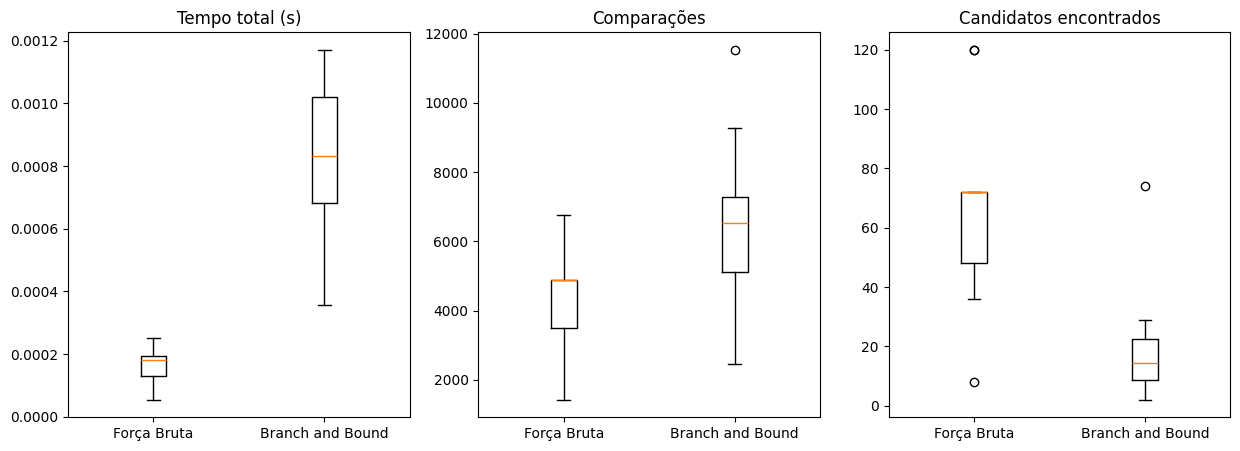

In [133]:
plot_boxplot_stats(small_bf, small_bb)

## 2. Instâncias médias

In [134]:
import pandas as pd

# Create a dataframe with the results for small instances
medium_bf = pd.DataFrame({
    'time': medium_times_bf,
    'comparisons': medium_comparisons_bf,
    'candidates_found': medium_candidates_found_bf,
    'solutions': medium_solutions_bf
})

medium_bb = pd.DataFrame({
    'time': medium_times_bb,
    'comparisons': medium_comparisons_bb,
    'candidates_found': medium_candidates_found_bb,
    'solutions': medium_solutions_bb
})



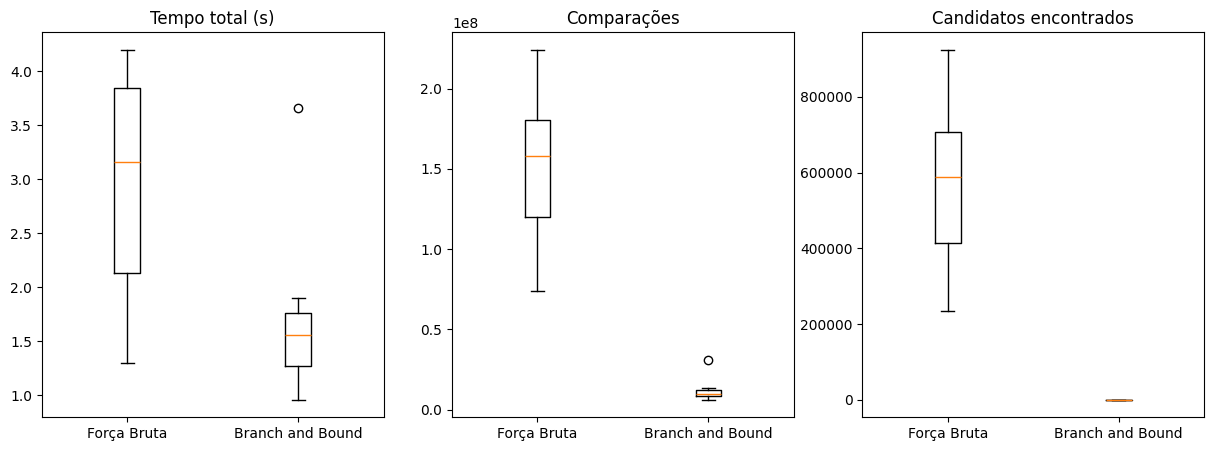

In [135]:
plot_boxplot_stats(medium_bf, medium_bb)


# 3. Instâncias "Grandes"

In [140]:
import pandas as pd

# Create a dataframe with the results for small instances
large_bf = pd.DataFrame({
    'time': large_times_bf,
    'comparisons': large_comparisons_bf,
    'candidates_found': large_candidates_found_bf,
    'solutions': large_solutions_bf
})

large_bb = pd.DataFrame({
    'time': large_times_bb,
    'comparisons': large_comparisons_bb,
    'candidates_found': large_candidates_found_bb,
    'solutions': large_solutions_bb
})



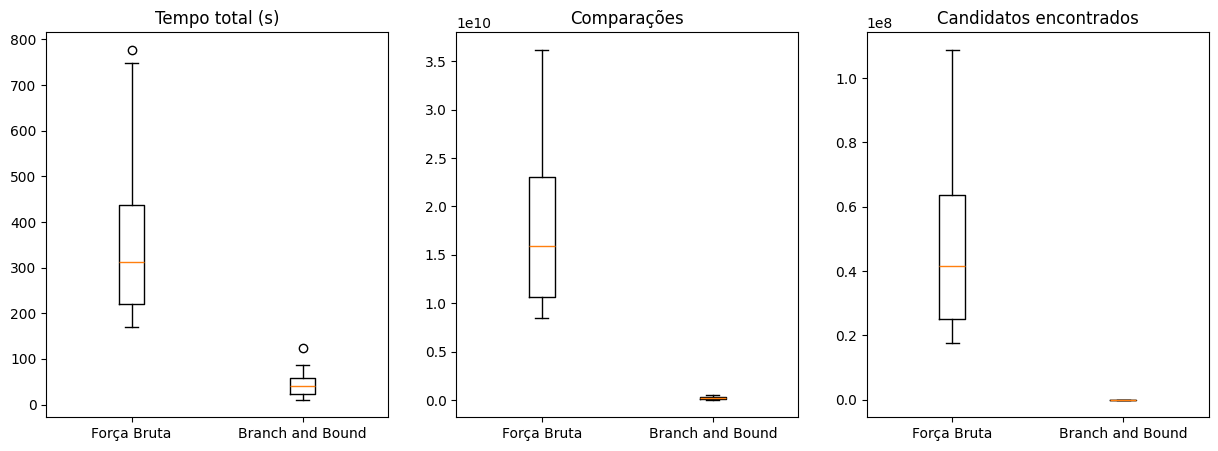

In [141]:
plot_boxplot_stats(large_bf, large_bb)
